In [ ]:
'''
@Author: Subhadeep Bhattacharjee
@Date: 2022-01-26 20:00
@Title: Visualising and performing some queries on cpu log data.

'''

In [1]:
from pyhive import hive
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

#all necessary imports.

In [ ]:
#the following lines are for making the connection and creating a database
try:
    conn = hive.Connection(host="localhost", port=10000)
    cur = conn.cursor()

    cur.execute("CREATE DATABASE cpu_data")
    print("Database created successfully")
    
except Exception as e:
    print(e)

Creating the table.

In [ ]:
conn = hive.Connection(host="localhost", port=10000, database= "cpu_data")
cur = conn.cursor()
#modifying the connection for future refence
cur.execute("create external table data(DateTime date,c1 string,c2 string,c3 string,c4 string,c5 string,c6 string,c7 string,c8 string,c9 string,c10 string,c11 string,c12 string,c13 string,c14 string,c15 string,c16 string,c17 string,c18 string,c19 string,c20 string,c21 string,c22 string,c23 string,c24 string,c25 string,c26 string,c27 string,c28 string,c29 string,c30 string,c31 string,c32 string,c33 string,c34 string,c35 string,c36 string,c37 string,c38 string,c39 string,user_name string,keyboard string,mouse string,c44 string,c45 string) row format delimited fields terminated by ',' stored as textfile location '/Cpu_Log/' tblproperties('skip.header.line.count'='1')")
print("Table created successfully!")


Showing all the user counts

In [29]:
try:
    users_working = pd.read_sql("select user_name ,count('user_name') as total_count from data where keyboard!=0 or mouse!=0 group by user_name",conn)
    print(users_working)
   
except Exception as e:
    print(e)

                      user_name  total_count
0  bhagyashrichalke21@gmail.com          361
1         damodharn21@gmail.com          191
2       deepshukla292@gmail.com          475
3            iamnzm@outlook.com          459
4     markfernandes66@gmail.com          389
5         rahilstar11@gmail.com          399
6      salinabodale73@gmail.com          440
7         sharlawar77@gmail.com          457


Extracting the average working hours.

In [30]:
try:
    avg_work_sec=pd.read_sql("select user_name,((((count(''))*5)*60)/6) as average_working_sec from data where keyboard!=0 or mouse!=0 group by user_name",conn)
    print(avg_work_sec)
except Exception as e:
    print(e)


                      user_name  average_working_sec
0  bhagyashrichalke21@gmail.com              18050.0
1         damodharn21@gmail.com               9550.0
2       deepshukla292@gmail.com              23750.0
3            iamnzm@outlook.com              22950.0
4     markfernandes66@gmail.com              19450.0
5         rahilstar11@gmail.com              19950.0
6      salinabodale73@gmail.com              22000.0
7         sharlawar77@gmail.com              22850.0


In [31]:
try:
    avg_work_hour = avg_work_sec
    avg_work_hour["average_working_sec"]= pd.to_datetime(avg_work_hour['average_working_sec'] ,unit= 's').dt.strftime("%H:%M")
    avg_work_hour.rename(columns={'average_working_sec': 'average_working_hour'}, inplace=True)
    print(avg_work_hour,"\n")

    print("Highest average working hour")
    highest_hr = avg_work_hour['average_working_hour'].max()
    highest_average_work_hour = avg_work_hour[avg_work_hour['average_working_hour'].str.contains(highest_hr)] 
    print(highest_average_work_hour,"\n")

    print("Lowest average working hour")
    lowest_hr = avg_work_hour['average_working_hour'].min()
    lowest_average_work_hour=avg_work_hour[avg_work_hour['average_working_hour'].str.contains(lowest_hr)]
    print(lowest_average_work_hour)

except Exception as e:
    print(e)

                      user_name average_working_hour
0  bhagyashrichalke21@gmail.com                05:00
1         damodharn21@gmail.com                02:39
2       deepshukla292@gmail.com                06:35
3            iamnzm@outlook.com                06:22
4     markfernandes66@gmail.com                05:24
5         rahilstar11@gmail.com                05:32
6      salinabodale73@gmail.com                06:06
7         sharlawar77@gmail.com                06:20 

Highest average working hour
                 user_name average_working_hour
2  deepshukla292@gmail.com                06:35 

Lowest average working hour
               user_name average_working_hour
1  damodharn21@gmail.com                02:39


Plotting Bar plots for the same

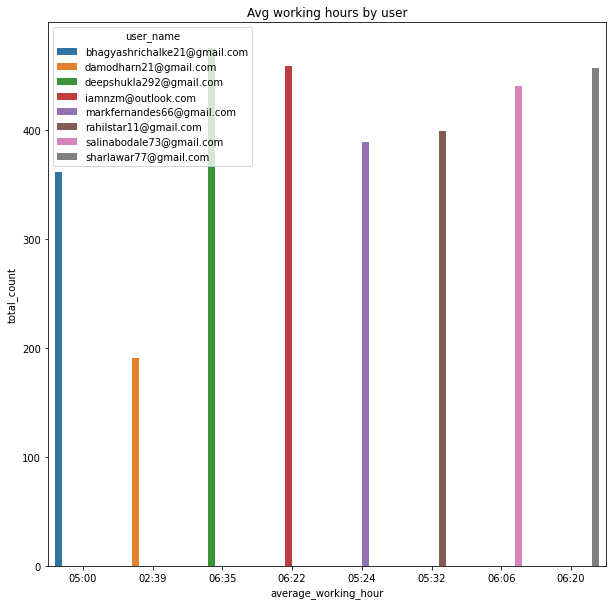

In [32]:
total = users_working['total_count']
plt.figure(figsize = (10,10))
sns.barplot(x="average_working_hour", y= total,hue = 'user_name',data= avg_work_hour)
plt.title("Avg working hours by user")
plt.show()

Calculating the idle hours

In [33]:
try:
    avg_idle_sec=pd.read_sql("select user_name,((((count(''))*5)*60)/6) as average_idle_sec from data where keyboard=0 and mouse=0 group by user_name",conn)
    print(avg_idle_sec)

except Exception as e:
    print(e)

                      user_name  average_idle_sec
0  bhagyashrichalke21@gmail.com            6050.0
1         damodharn21@gmail.com            3100.0
2       deepshukla292@gmail.com            4500.0
3            iamnzm@outlook.com            7750.0
4     markfernandes66@gmail.com            5950.0
5         rahilstar11@gmail.com            7600.0
6      salinabodale73@gmail.com            6450.0
7         sharlawar77@gmail.com            6150.0


In [34]:
try:
    avg_idle_hour = avg_idle_sec
    avg_idle_hour["average_idle_sec"]= pd.to_datetime(avg_idle_hour['average_idle_sec'] ,unit='s').dt.strftime("%H:%M")
    avg_idle_hour.rename(columns={'average_idle_sec': 'average_idle_hour'}, inplace=True)
    print(avg_idle_hour,"\n")

    print("Highest average idle hour")
    high = avg_idle_hour['average_idle_hour'].max()
    highest_average_idle_hour=avg_idle_hour[avg_idle_hour['average_idle_hour'].str.contains(high)]
    print(highest_average_idle_hour,"\n")

    print("Lowest average idle hour")
    low = avg_idle_hour['average_idle_hour'].min()
    lowest_average_idle_hour=avg_idle_hour[avg_idle_hour['average_idle_hour'].str.contains(low)]
    print(lowest_average_idle_hour)

except Exception as e:
    print(e)

                      user_name average_idle_hour
0  bhagyashrichalke21@gmail.com             01:40
1         damodharn21@gmail.com             00:51
2       deepshukla292@gmail.com             01:15
3            iamnzm@outlook.com             02:09
4     markfernandes66@gmail.com             01:39
5         rahilstar11@gmail.com             02:06
6      salinabodale73@gmail.com             01:47
7         sharlawar77@gmail.com             01:42 

Highest average idle hour
            user_name average_idle_hour
3  iamnzm@outlook.com             02:09 

Lowest average idle hour
               user_name average_idle_hour
1  damodharn21@gmail.com             00:51


Plot of the above details.

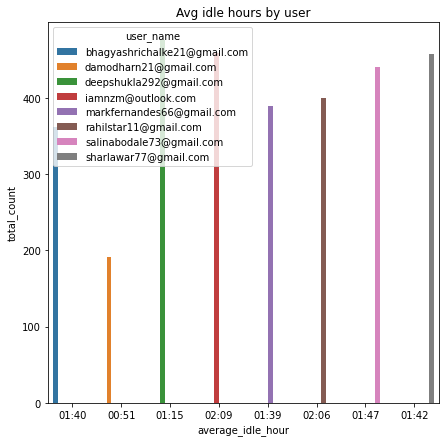

In [35]:
total = users_working['total_count']
plt.figure(figsize = (7,7))
sns.barplot(x="average_idle_hour", y= total,hue = 'user_name',data= avg_idle_hour)
plt.title("Avg idle hours by user")
plt.show()